# HW8

### Author: Joseph Wong

This notebook uses data from the Kaggle 'Video Game Sales' data set:

https://www.kaggle.com/datasets/gregorut/videogamesales

It was accessed on (10/5/2025).

Data set was created by Gregory Smith. Data collection was performed by scraping https://www.vgchartz.com. The data pertains to video games with sales over 100,000 copies. Its license is unknown.

## Import Packages and the Data Set

In [214]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

In [215]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gregorut/videogamesales")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\josee\.cache\kagglehub\datasets\gregorut\videogamesales\versions\2


In [216]:
os.listdir(path)

['vgsales.csv']

In [217]:
file = path+'\\'+os.listdir(path)[0]
df = pd.read_csv(file)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Data Overview

In [218]:
df.shape

(16598, 11)

There are 16,598 observations and 11 variables.

In [219]:
df.keys()

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [220]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

**Numerical**
- **'Rank' (int):** Ranking of overall sales
- **'Year' (float):** Year of the game's release
- **'NA_Sales' (float):** Sales in North America (in millions)
- **'EU_Sales' (float):** Sales in Europe (in millions)
- **'JP_Sales' (float):** Sales in Japan (in millions)
- **'Other_Sales' (float):** Sales in the rest of the world (in millions)
- **'Global_Sales' (float):** Total worldwide sales

**Categorical**
- **'Name' (object):** The games name
- **'Platform' (object):** Platform of the games release (i.e. PC,PS4, etc.)
- **'Genre' (object):** Genre of the game
- **'Publisher' (object):** Publisher of the game

*Variable descriptions taken from https://www.kaggle.com/datasets/gregorut/videogamesales*

## Cross-tabulate: Game Count by Platform and Genre

In [221]:
# crosstab returns frequency grouped by 'Platform' (rows), then 'Genre' (cols)
# margins=True creates subtotal row and col
# iloc[1:5] masks to show rows 1-4 (since row 0 is the subtotal row)
cdata = pd.crosstab(df['Platform'],df['Genre'],margins=True).sort_values('All',ascending=False).iloc[1:5]
cdata

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Platform,,,,,,,,,,,,,
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163
PS2,348,196,150,222,103,18,216,187,160,90,400,71,2161
PS3,380,74,76,124,37,3,92,119,156,31,213,24,1329
Wii,238,84,42,280,58,55,94,35,66,87,261,25,1325


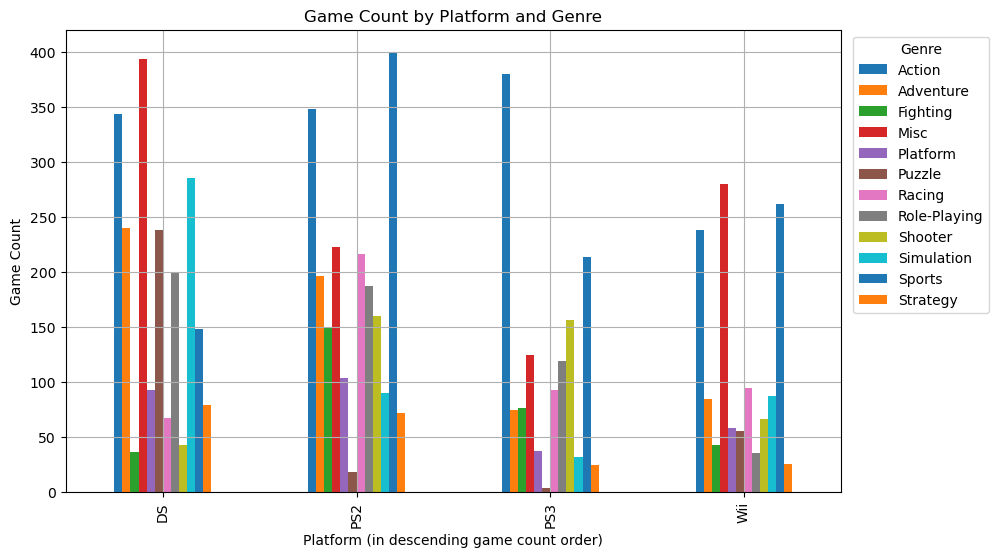

In [222]:
cdata.drop(columns='All').plot.bar()
plt.grid()
plt.title("Game Count by Platform and Genre")
plt.xlabel("Platform (in descending game count order)")
plt.ylabel("Game Count")
plt.legend(title="Genre",bbox_to_anchor=(1.2,1))
plt.show()

The graph displays the number of games released for gaming platforms, specifically the platforms with the top four counts. Then, the counts are divided into game genres. The DS platform has the most number of video games with sales greater than 100,000 copies. We will ignore the counts for the miscellaneous genre because it does not give much specific insight into the genre. The most common genre for DS is action. The most common genre for PS2 is sports. The most common genre for PS3 is action. The most common genre for Wii is sports. It seems that the most common genres across the top four gaming platforms are action and sports.

## Mean Game Sales for Top Platforms (by Game Count) in EU, NA, and JP

In [223]:
my_cols = ['NA_Sales','EU_Sales','JP_Sales','Platform']
# create temp_df of df that only contains data for top four platforms by game count
country_means = df[my_cols][df['Platform'].isin(cdata.index)].groupby('Platform').mean()
country_means

,NA_Sales,EU_Sales,JP_Sales
Platform,,,
DS,0.180633,0.089991,0.081170
PS2,0.270171,0.157006,0.064415
PS3,0.295154,0.258623,0.060188
Wii,0.383177,0.202551,0.052340


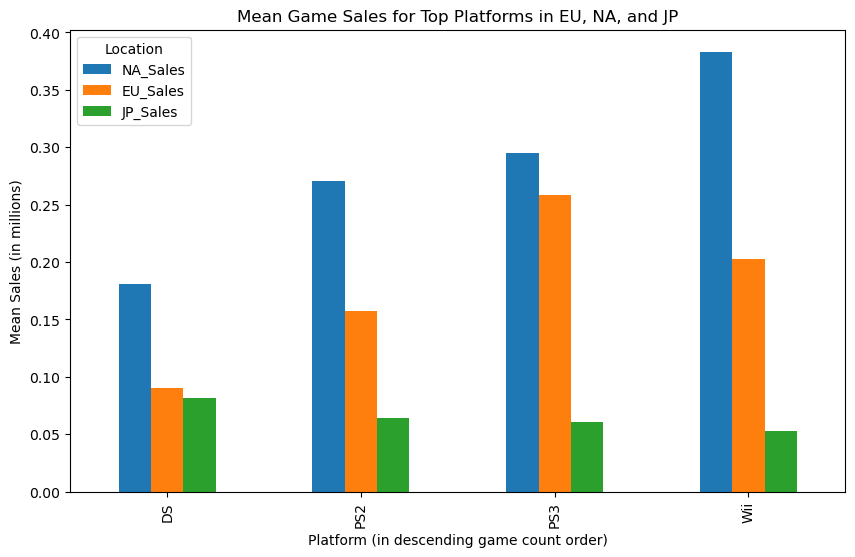

In [224]:
country_means.plot.bar()
plt.title("Mean Game Sales for Top Platforms in EU, NA, and JP")
plt.xlabel("Platform (in descending game count order)")
plt.ylabel("Mean Sales (in millions)")
plt.legend(title="Location")
plt.show()

The graph displays the mean game sales of the top four gaming platforms (by number of games released) grouped by the location (NA, EU, or JP). Across these platforms, NA has the greatest mean sales, then EU, and finally JP has the least mean sales. It appears that platforms with fewer number of games released (as seen in the previous graph) tend to have a greater mean sales compared to those with more games released.

## Mean Game Sales for Game Genres in EU, NA, and JP

In [225]:
my_cols = ['NA_Sales','EU_Sales','JP_Sales','Global_Sales','Genre']
# sort from greatest to least global sales, but do not include global sales column to keep better graph scale
genre_sales = df[my_cols].groupby('Genre').mean().sort_values('Global_Sales',ascending=False)
genre_sales.drop('Global_Sales',axis=1,inplace=True)
genre_sales

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Platform,0.504571,0.227573,0.147596
Shooter,0.444733,0.239137,0.029221
Role-Playing,0.219946,0.126384,0.236767
Racing,0.287766,0.190865,0.045388
Sports,0.291283,0.160635,0.057702
Fighting,0.263667,0.119481,0.103007
Action,0.264726,0.158323,0.048236
Misc,0.235906,0.124198,0.061967
Simulation,0.211430,0.130773,0.073472


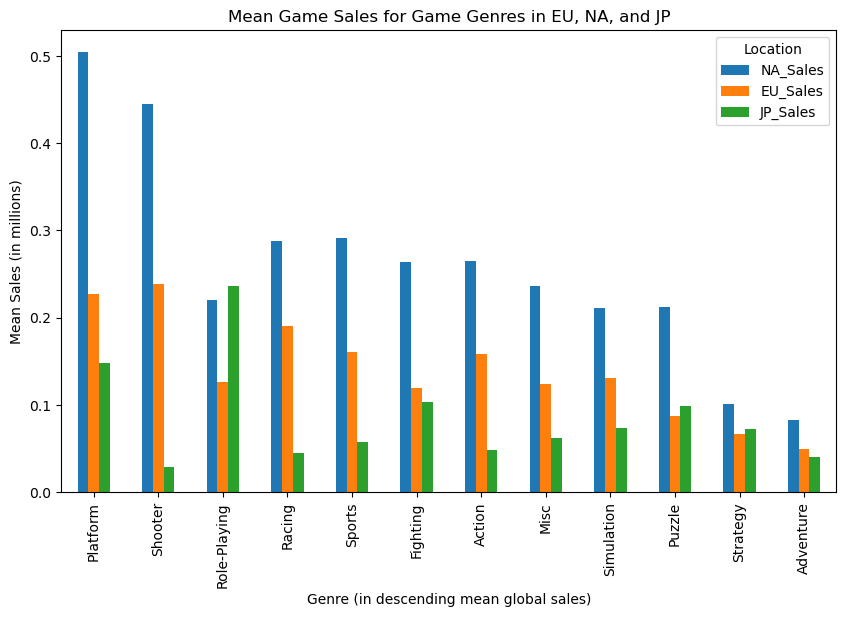

In [226]:
genre_sales.plot.bar()
plt.title("Mean Game Sales for Game Genres in EU, NA, and JP")
plt.xlabel("Genre (in descending mean global sales)")
plt.ylabel("Mean Sales (in millions)")
plt.legend(title="Location")
plt.show()

This graph displays the mean game sales for game genres grouped by the sale location (EU, NA, or JP). The game genres are in descending order by mean global sales. The greatest mean sales is platform games in NA, shooter games in EU, and role-playing games in JP. The least mean sales is adventure games in NA and EU, and shooter games in JP. It appears that the shooter genre is popular in both NA and EU but very unpopular in JP.

## Yearly Game Sale Data in EU, NA, and JP

In [227]:
my_cols = ['NA_Sales','EU_Sales','JP_Sales','Year']
year_data = df[my_cols].groupby(['Year']).agg(['mean','max'])
year_data

NA_Sales         EU_Sales         JP_Sales       
            mean    max      mean    max      mean    max
Year                                                     
1980.0  1.176667   4.00  0.074444   0.26  0.000000   0.00
1981.0  0.726087   4.21  0.042609   0.24  0.000000   0.00
1982.0  0.747778   7.28  0.045833   0.45  0.000000   0.00
1983.0  0.456471   1.22  0.047059   0.12  0.476471   2.35
1984.0  2.377143  26.93  0.150000   0.63  1.019286   2.46
1985.0  2.409286  29.08  0.338571   3.58  1.040000   6.81
1986.0  0.595238   3.74  0.135238   0.93  0.943333   2.65
1987.0  0.528750   2.19  0.088125   0.50  0.726875   2.41
1988.0  1.591333   9.54  0.439333   3.44  1.050667   3.84
1989.0  2.655882  23.20  0.496471   2.71  1.080000   4.22
1990.0  1.591250  12.78  0.476875   3.75  0.930000   3.54
1991.0  0.311220   3.03  0.096341   0.91  0.360488   1.33
1992.0  0.787674   6.16  0.272326   2.04  0.672326   3.81
1993.0  0.252000   5.99  0.077500   2.15  0.422167   2.12
1994.0  0.232645   4.36  0.122975   2.79  0.280909   3.00
1995.0  0.113333   2.26  0.068037   2.27  0.208904   3.19
1996.0  0.329886  11.27  0.179696   8.89  0.218403  10.22
1997.0  0.327855   5.80  0.167197   3.87  0.169100   3.28
1998.0  0.338681   5.89  0.176517   5.04  0.132032   3.12
1999.0  0.372959   9.00  0.185414   6.18  0.154852   7.20
2000.0  0.270745   3.05  0.151146   2.10  0.122550   4.10
2001.0  0.360954   6.99  0.196867   5.09  0.082697   2.73
2002.0  0.260784   8.41  0.132376   5.49  0.050374   5.38
2003.0  0.249794   4.12  0.133948   2.83  0.044129   2.11
2004.0  0.291730   9.43  0.140655   6.21  0.054587   3.61
2005.0  0.257821   9.81  0.129586  11.00  0.057683   5.33
2006.0  0.261032  41.49  0.128214  29.02  0.073145   6.50
2007.0  0.259609   8.94  0.133527   8.03  0.050158   3.60
2008.0  0.246106  15.85  0.129132  12.88  0.042199   4.13
2009.0  0.236792  15.75  0.133885  11.01  0.043249   4.70
2010.0  0.241652  14.97  0.140373   4.94  0.047252   5.65
2011.0  0.211642   9.03  0.147006   5.82  0.046567   2.67
2012.0  0.235860   8.25  0.180791   5.88  0.078752   4.36
2013.0  0.283462   9.63  0.230403   9.27  0.087161   4.34
2014.0  0.226753   4.23  0.215893   5.81  0.067801   3.18
2015.0  0.167459   5.77  0.159137   6.06  0.054919   2.78
2016.0  0.065872   1.30  0.077791   3.75  0.039826   1.27
2017.0  0.000000   0.00  0.000000   0.00  0.016667   0.03
2020.0  0.270000   0.27  0.000000   0.00  0.000000   0.00

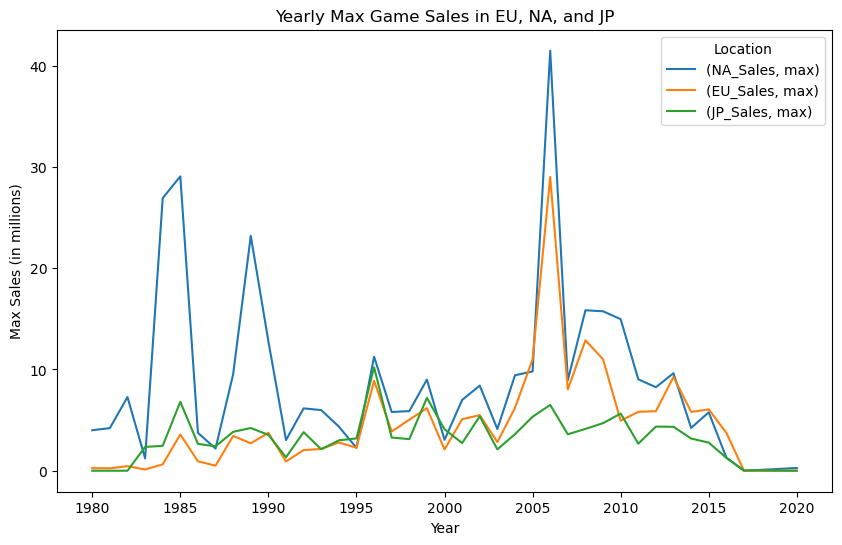

In [228]:
drop_cols = [('NA_Sales','mean'),('EU_Sales','mean'),('JP_Sales','mean')]
year_data.drop(drop_cols,axis=1).plot()
plt.title("Yearly Max Game Sales in EU, NA, and JP")
plt.xlabel("Year")
plt.ylabel("Max Sales (in millions)")
plt.legend(title="Location")
plt.show()

In [229]:
df[df['Year'] == 1985].head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [230]:
df[df['Year'] == 1989].head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26


In [231]:
df[df['Year'] == 1996].head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


In [232]:
df[df['Year'] == 2006].head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


The graph displays the max game sales over time (by year) grouped by location (EU, NA, or JP). There are max sale spikes for all three locations around the years 1985 (Super Mario Bros.), 1996 (Pokemon Red/Pokemon Blue), and 2006 (Wii Sports). There is also a max sale spike for the NA in 1989 (Tetris). The overall shape of the graphs suggests an increase in max sales up to 2006, and then a decrease following that.